# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Sara Calle Muñoz
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline
from scipy.integrate import trapezoid, simpson, fixed_quad,  dblquad

In [2]:
#definimos los datos de tiempo (t) y corriente (i)
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # Tiempo en segundos
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # Corriente en amperios

#creamos el DataFrame
df = pd.DataFrame({'Tiempo (s)': t, 'Corriente (A)': i})
print(df)

   Tiempo (s)  Corriente (A)
0        1.00           3.10
1        1.01           3.12
2        1.02           3.14
3        1.03           3.18
4        1.04           3.24


In [3]:
#para calcular la derivada con el método de diferencias finitas
def derivada_finita(t, i):
    n = len(t)
    di_dt = np.zeros(n)
    h = t[1] - t[0]

    for j in range(n):
        if j == 0:
            di_dt[j] = (i[j+1] - i[j]) / h  # Adelante
        elif j == n - 1:
            di_dt[j] = (i[j] - i[j-1]) / h  # Atrás
        else:
            di_dt[j] = (i[j+1] - i[j-1]) / (2*h)  # Centrada
    return di_dt

#para calcular la derivada con el método de tres puntos
def derivada_tres_puntos(t, i):
    n = len(t)
    di_dt = np.zeros(n)
    h = t[1] - t[0]

    for j in range(n):
        if j == 0:
            di_dt[j] = (-3*i[j] + 4*i[j+1] - i[j+2]) / (2*h)
        elif j == n - 1:
            di_dt[j] = (3*i[j] - 4*i[j-1] + i[j-2]) / (2*h)
        else:
            di_dt[j] = (i[j+1] - i[j-1]) / (2*h)
    return di_dt

In [4]:
df_finitas = derivada_finita(t, i)
df_tres_puntos = derivada_tres_puntos(t, i)

print("Derivada por diferencias finitas centradas:", df_finitas)
print("Derivada por tres puntos:", df_tres_puntos)

# Constantes del circuito
L = 0.98  # Henrios
R = 0.142  # Ohmios

volt_dif_finitas = L * df_finitas + R * i
volt_tres_puntos = L * df_tres_puntos + R * i

print("Voletaje por diferencias finitas centradas:", volt_dif_finitas)
print("Voletaje por tres puntos:", volt_tres_puntos)

Derivada por diferencias finitas centradas: [2. 2. 3. 5. 6.]
Derivada por tres puntos: [2. 2. 3. 5. 7.]
Voletaje por diferencias finitas centradas: [2.4002  2.40304 3.38588 5.35156 6.34008]
Voletaje por tres puntos: [2.4002  2.40304 3.38588 5.35156 7.32008]


In [5]:
#derivada utilizando el polinomio de interpolación
pol_lagrange = lagrange(t, i)
df_exacta = pol_lagrange.deriv()

volt_lagrange = L * df_exacta + R * i
print("Voletaje por interpolación de Lagrange:", volt_lagrange)

Voletaje por interpolación de Lagrange:         4             3             2
0.4402 x - 3.267e+05 x + 1.005e+06 x - 1.029e+06 x + 3.515e+05


In [6]:
df_results = pd.DataFrame({
    'Tiempo (s)': t,
    'Corriente (A)': i,
    'df (DF)': df_finitas,
    'Voltaje (DF)': volt_dif_finitas,
    'df (3 puntos)': df_tres_puntos,
    'Voltaje (3 puntos)': volt_tres_puntos,
    'df (Lagrange)': df_exacta(t),
    'Voltaje (Lagrange)': volt_lagrange(t)
})

display(df_results)

,Tiempo (s),Corriente (A),df (DF),Voltaje (DF),df (3 puntos),Voltaje (3 puntos),df (Lagrange),Voltaje (Lagrange)
0,1.00,3.10,2.0,2.40020,2.0,2.40020,3.166667,5.344093
1,1.01,3.12,2.0,2.40304,2.0,2.40304,1.500000,3.755536
2,1.02,3.14,3.0,3.38588,3.0,3.38588,2.833333,5.107876
3,1.03,3.18,5.0,5.35156,5.0,5.35156,5.166667,7.441125
4,1.04,3.24,6.0,6.34008,7.0,7.32008,6.500000,8.795298


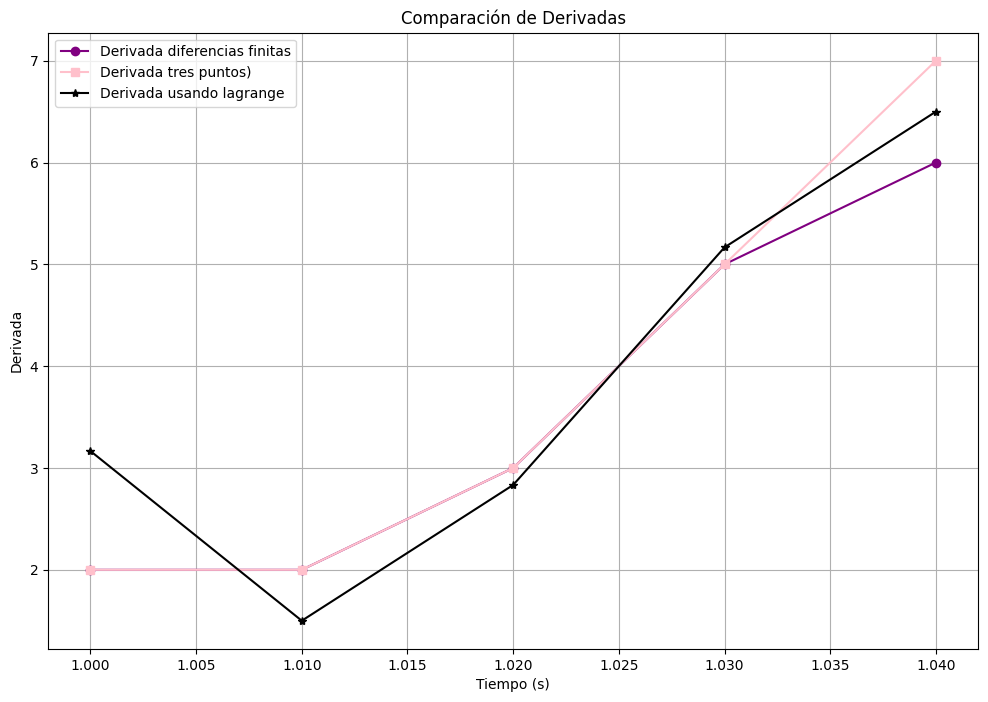

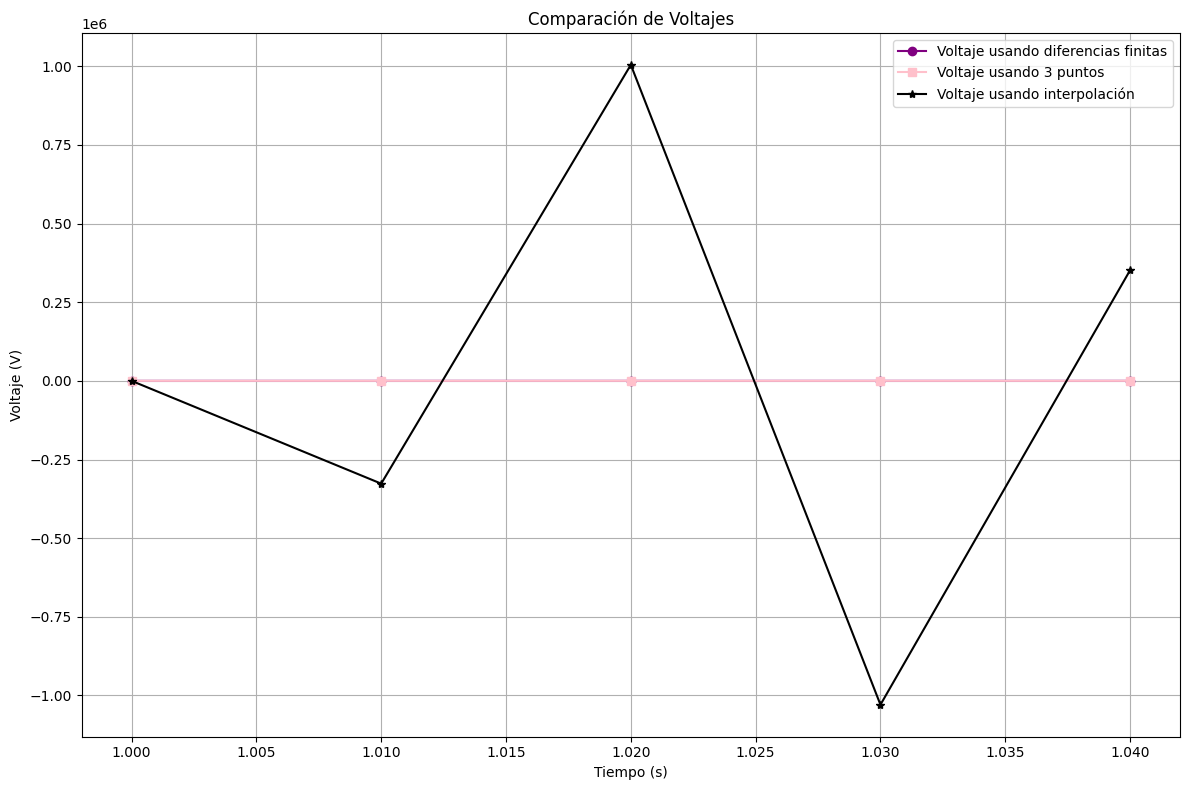

In [7]:
#graficamos las derivadas
plt.figure(figsize=(12, 8))
plt.plot(t, df_finitas, 'o-', color = 'purple', label='Derivada diferencias finitas')
plt.plot(t, df_tres_puntos, 's-', color = 'pink', label='Derivada tres puntos)')
plt.plot(t, df_exacta(t), '*-', color = 'black', label='Derivada usando lagrange') # Evaluate the derivative at time points t
plt.xlabel('Tiempo (s)')
plt.ylabel('Derivada')
plt.title('Comparación de Derivadas')
plt.legend()
plt.grid(True)

#graficamos los voltajes
plt.figure(figsize=(12, 8))
plt.plot(t, volt_dif_finitas, 'o-', color = 'purple', label='Voltaje usando diferencias finitas')
plt.plot(t, volt_tres_puntos, 's-', color = 'pink', label='Voltaje usando 3 puntos')
plt.plot(t, volt_lagrange, '*-', color = 'black', label='Voltaje usando interpolación')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Comparación de Voltajes')
plt.legend()
plt.grid(True)

# Ajustamos la visualización
plt.tight_layout()
plt.show()

# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [26]:
t = np.array([0, 3, 5, 8, 10, 13]) #tiempo en segundos
x = np.array([0, 225, 383, 623, 742, 993]) #distancia recorrida en metros

In [27]:
#interpolación
poly = lagrange(t, x)

#derivamos
velocidad = poly.deriv()

#evaluamos la velocidad t = 12
v12 = velocidad(12)
print("Velocidad en t = 12:", v12)

Velocidad en t = 12: 91.73697802196048


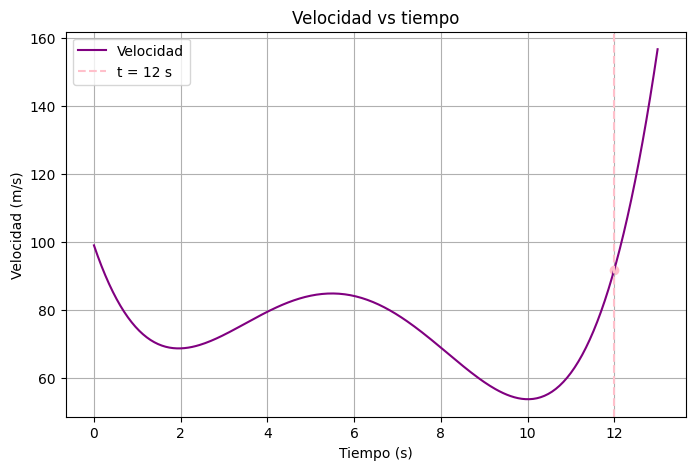

In [10]:
#para gráficar
s = np.linspace(0, 13, 300)
v_s = velocidad(s)

#graficamos la velocidad (derivada del polinomio)
plt.figure(figsize=(8, 5))
plt.plot(s, v_s, label='Velocidad', color='purple')
plt.axvline(12, color='pink', linestyle='--', label='t = 12 s')
plt.scatter(12, v12, color='pink')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad vs tiempo")
plt.grid(True)
plt.legend()
plt.show()

# 3.
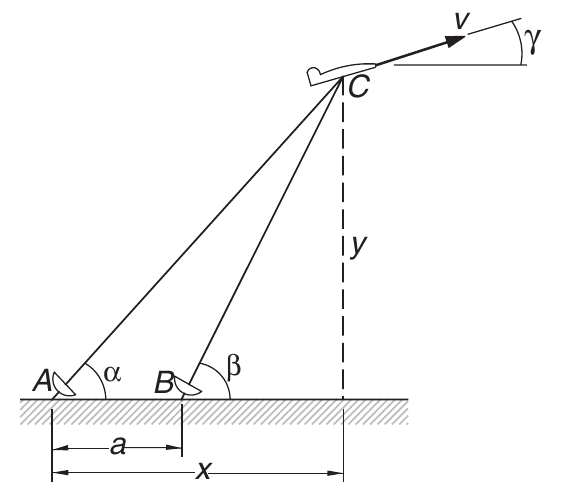


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [28]:
#datos
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)

#convertimos a radianes
df['alpha (rad)'] = np.deg2rad(df['alpha (°)'])
df['beta (rad)'] = np.deg2rad(df['beta (°)'])

#coordenadas x, y
a = 500
tan_alpha = np.tan(df['alpha (rad)'])
tan_beta = np.tan(df['beta (rad)'])

df['x (m)'] = a * tan_beta / (tan_beta - tan_alpha)
df['y (m)'] = a * tan_alpha * tan_beta / (tan_beta - tan_alpha)

df

,t (s),alpha (°),beta (°),alpha (rad),beta (rad),x (m),y (m)
0,9,54.80,65.59,0.956440,1.144761,1401.918398,1987.346016
1,10,54.06,64.59,0.943525,1.127308,1450.497006,2000.840713
2,11,53.34,63.62,0.930959,1.110378,1498.640350,2013.512411


In [30]:
#vectores de tiempo x, y
t = df['t (s)'].to_numpy()
x = df['x (m)'].to_numpy()
y = df['y (m)'].to_numpy()

#interpolamos
poly_x = lagrange(t, x)
poly_y = lagrange(t, y)

#derivada
dx_dt = poly_x.deriv()
dy_dt = poly_y.deriv()

#evaluamos en t=10s
vx = dx_dt(10)
vy = dy_dt(10)

#módulo de la velocidad y ángulo de ascenso
v = np.sqrt(vx**2 + vy**2)
gamma = np.arctan2(vy, vx)

print(f"Velocidad v ≈ {v} m/s")
print(f"Ángulo de ascenso γ ≈ {np.rad2deg(gamma)}°")

Velocidad v ≈ 50.09944162965287 m/s
Ángulo de ascenso γ ≈ 15.137987979364732°


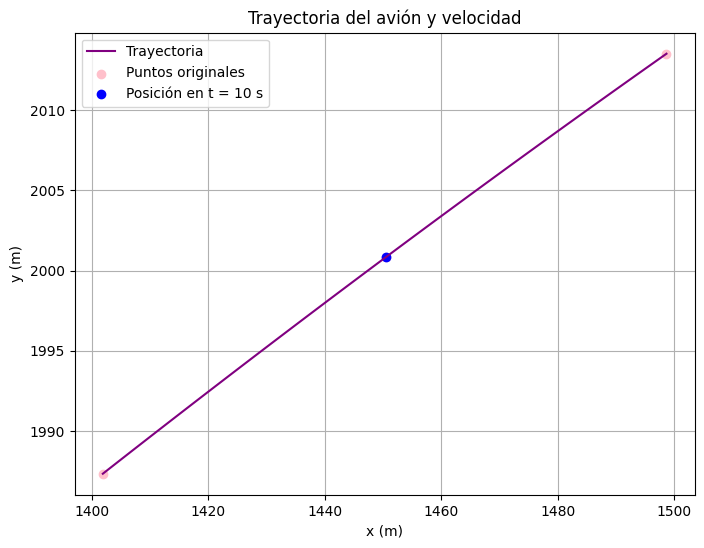

In [31]:
#para graficar la trayectoria
t_f = np.linspace(9, 11, 100)
x_f = poly_x(t_f)
y_f = poly_y(t_f)

#posición en t=10s
x_10 = poly_x(10)
y_10 = poly_y(10)

#graficamos
plt.figure(figsize=(8, 6))
plt.plot(x_f, y_f, color = 'purple', label='Trayectoria')
plt.scatter(x, y, color='pink', label='Puntos originales')
plt.scatter(x_10, y_10, color='blue', label='Posición en t = 10 s')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trayectoria del avión y velocidad')
plt.legend()
plt.grid(True)
plt.show()


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [14]:
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

In [15]:
#calculemos la distancia entre t = 0 y t = 28s
#datos hasta t = 28s
t_sub = t[:8]
v_sub = v[:8]

#integramos para obtener la distancia
distancia = trapezoid(v_sub, t_sub)
print(f"Distancia recorrida desde t = 0 hasta t = 28 s: {distancia:.2f} metros")

#calculemos la aceleración en t = 28 s
#usamos interpolación de Lagrange para aproximar v(t)
pol_lagrange = lagrange(t, v)

#derivamos el polinomio para obtener la aceleración
a = pol_lagrange.deriv()

#evaluamos la aceleración en t = 28 s
aceleracion = a(28)

print(f"Aceleración del objeto en t = 28 s: {aceleracion:.2f} m/s^2")

Distancia recorrida desde t = 0 hasta t = 28 s: 2309.00 metros
Aceleración del objeto en t = 28 s: 1.73 m/s^2


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [16]:
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

In [17]:
#derivamos para obtener A_s
dV_dz = -np.gradient(V, z)
As = dV_dz

#integramos para obtener V_T
VT = simpson(As, z)

In [18]:
#calculemos la concentración promedio
c_As = c*As
numerador = simpson(c_As, z)

#concentración promedio
c_prom = numerador / VT

#resultado
print(f"Concentración promedio: {c_prom} g/m^3")

Concentración promedio: 8.097333333333333 g/m^3


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [19]:
#para el método trapezoidal
def tol(f, a, b, n, tol=1e-6):
    valor = 1.0
    integral_anterior = 0.0

    while valor > tol:
        x = np.linspace(a, b, n + 1)
        y = f(x)
        integral = trapezoid(y, x)
        valor = abs(integral - integral_anterior)
        integral_anterior = integral
        n *= 2

    return integral

#para el método de cuadratura gaussiana
def tol_gauss(f, a, b, n, tol=1e-6):
    error = 1.0
    integral_anterior = 0.0

    while error > tol:
        integral, _ = fixed_quad(f, a, b, n=n)
        error = abs(integral - integral_anterior)
        integral_anterior = integral
        n *= 2

    return integral

#para el método de simpson
def tol_simpson(f, a, b, n, tol=1e-6):
    valor = 1.0
    integral_anterior = 0.0

    while valor > tol:
        x = np.linspace(a, b, n + 1)
        y = f(x)
        integral = simpson(y, x)
        valor = abs(integral - integral_anterior)
        integral_anterior = integral
        n *= 2

    return integral

In [20]:
#definimos el integrando
def f(r):
    return r**2 * (2 - r)**2 * np.exp(-r)

#valores para R
R_vals = np.arange(10, 26, 1)

#listas para guardar los resultados
P_trap = []
P_simp = []
P_gauss = []

#evaluamos con cada método
for R in R_vals:
    I_trap = tol(f, 0, R, n=4, tol=1e-6) / 8
    I_simp = tol_simpson(f, 0, R, n=4, tol=1e-6) / 8
    I_gauss = tol_gauss(f, 0, R, n=4, tol=1e-6) / 8

    P_trap.append(I_trap)
    P_simp.append(I_simp)
    P_gauss.append(I_gauss)

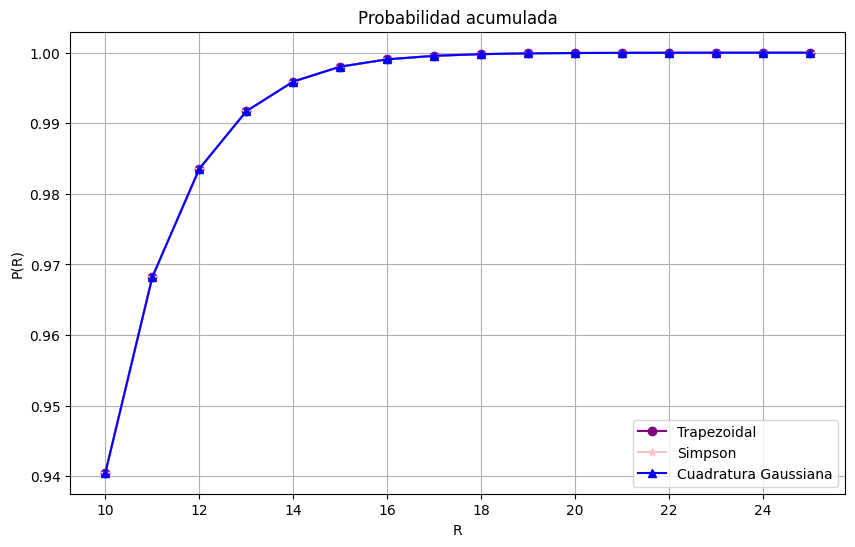

In [21]:
#gráficamos
plt.figure(figsize=(10,6))
plt.plot(R_vals, P_trap, label="Trapezoidal",  color = 'purple', marker='o')
plt.plot(R_vals, P_simp, label="Simpson", color = 'pink', marker='*')
plt.plot(R_vals, P_gauss, label="Cuadratura Gaussiana",  color = 'blue', marker='^')
plt.xlabel('R')
plt.ylabel('P(R)')
plt.title('Probabilidad acumulada')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
#verifiquemos si la probabilidad total es 1
R_max = 100  #limite superior suficientemente grande

#calculamos la probabilidad total con cada método
P_total_trap = tol(f, 0, R_max, n=4, tol=1e-6) / 8
P_total_simp = tol_simpson(f, 0, R_max, n=4, tol=1e-6) / 8
P_total_gauss = tol_gauss(f, 0, R_max, n=4, tol=1e-6) / 8

print("Probabilidad total con método trapezoidal:", P_total_trap)
print("Probabilidad total con método de Simpson:", P_total_simp)
print("Probabilidad total con cuadratura gaussiana:", P_total_gauss)

Probabilidad total con método trapezoidal: 0.9999999970397903
Probabilidad total con método de Simpson: 1.0000000007400285
Probabilidad total con cuadratura gaussiana: 1.0000000000000016


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

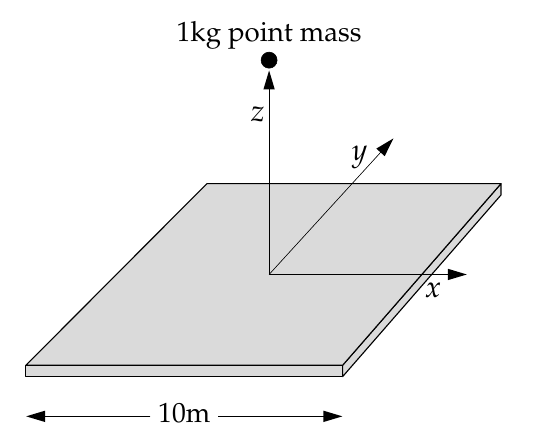

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


In [23]:
#parametros
G = 6.674e-11  #m^3 kg^-1 s^-2
L = 10.0  # metros
M = 10000.0  #kg
sigma = M / (L**2)

#definimos el integrando
def integrando(y, x, z):
    return 1.0 / (x**2 + y**2 + z**2)**(1.5)

#calculamos la fuerza
def calcular_Fz(z):
    integral, error = dblquad(integrando, -L/2, L/2, lambda x: -L/2, lambda x: L/2, args=(z,))
    Fz = G * sigma * z * integral
    return Fz

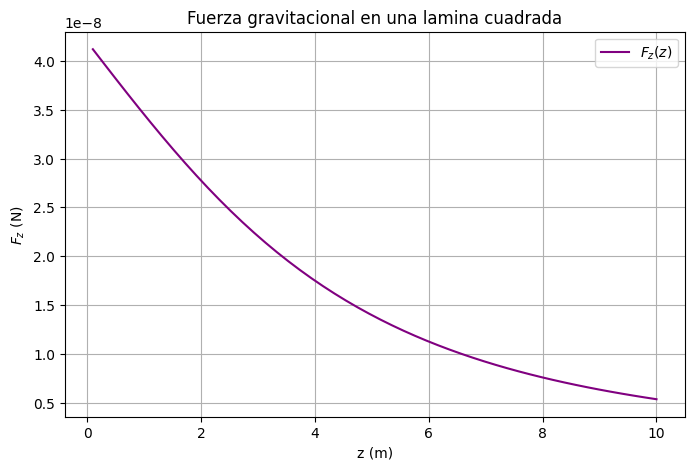

In [24]:
#valores de z desde 0.1 m hasta 10 m
z_vals = np.linspace(0.1, 10, 50)
Fz_vals = []

#calculamos Fz para cada valor de z
for z in z_vals:
    Fz_vals.append(calcular_Fz(z))

#graficamos
plt.figure(figsize=(8, 5))
plt.plot(z_vals, Fz_vals, label=r"$F_z(z)$", color='purple')
plt.xlabel("z (m)")
plt.ylabel(r"$F_z$ (N)")
plt.title("Fuerza gravitacional en una lamina cuadrada")
plt.grid(True)
plt.legend()
plt.show()